<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/Copy_of_10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


### Clean the dataset 
---


Ideas for cleaning the data
Remove the unnamed column as it is just an index that not needed.
Make sure that there are no spaces " " in the columns
Sort by genre or year.
Remove films with no ranking - to reduce the size.
Decided only rank needed to be cleaned up.

In [5]:
#df.isnull().values.any()
df_cleaned = df.dropna()
df_cleaned.info()
#df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


In [6]:
#df['name of column'].duplicated().any()
df_dupli_cleaned = df.drop_duplicates()
df_dupli_cleaned.info()
df_dupli_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB


,Unnamed: 0,year,rank
count,368894.000000,368894.000000,113376.000000
mean,184446.500000,1969.442222,5.995124
std,106490.669438,29.082051,1.540330
min,0.000000,1888.000000,1.000000
25%,92223.250000,1947.000000,5.100000
50%,184446.500000,1976.000000,6.200000
75%,276669.750000,1996.000000,7.100000
max,368893.000000,2007.000000,9.900000


### How many movies of each genre are there?
---

In [7]:
genre_counts = df["genre"].value_counts()
print(genre_counts)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [8]:
def highest_ranks():
  directors = df
  directors["Top directors"] = df["first_name"] + " " + df["last_name"] 
  best_director = df[df['rank'] == 9.9].groupby('Top directors',)['rank'].count()
  return best_director

highest_ranks()

Top directors
Abel Gance              1
Andrew Cappelletti      2
András Salamon          1
Arünas Zebriünas        1
Ben Holmes              2
Benjamin Christensen    1
Carole Roussopoulos     5
Debs Tarrier            2
Fedor Hanzekovic        1
Georgi Daneliya         1
Gregg Zehentner         3
Ioana Wieder            2
Ishmael Bernal          1
Isidor Annensky         1
Ivanka Grybcheva        1
Jim Jarmusch            1
Jirí (I) Trnka          1
John Cassavetes         2
Jonathan Demme          2
Julio (I) Bracho        3
Kirsten Tretbar         1
Marcell Jankovics       1
Matthew Crandall        2
Satyen Bose             3
Scott Barkan            3
See-Yuen Ng             1
Sergei M. Eisenstein    1
Sergiu Nicolaescu       2
Vsevolod Pudovkin       1
William T. Hurtz        2
Zack Resnicoff          4
Name: rank, dtype: int64

### How many movies have ranks of over 9?
---


In [9]:
topranks = df[df['rank'] > 9].count()
print(topranks)
topranks[0]

Unnamed: 0       1483
first_name       1483
last_name        1483
name             1483
year             1483
rank             1483
genre            1483
Top directors    1483
dtype: int64


1483

In [10]:
df3 = df_dupli_cleaned[df_dupli_cleaned['rank'] > 9].groupby('name')['rank'].count()
print(df3)
df3[0]
#alternative way?

name
$40,000                       1
+1 -1                         3
12 (2003/II)                  1
12 stulyev                    1
14 Million Dreams             2
                             ..
ber lmok                      1
brio, O                       1
gigr f                        1
ltima llamada, La (1996/I)    1
tre avec                      2
Name: rank, Length: 828, dtype: int64


1

### Plot a bar chart of mean rank and genre
---

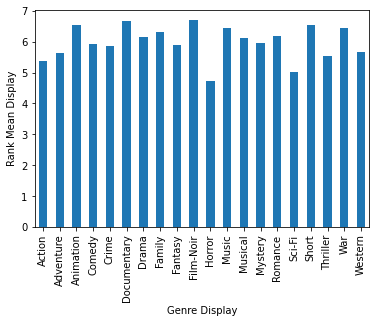

In [11]:
ranking = df_cleaned.groupby('genre')['rank'].mean()
barchart = ranking.plot(x="genre", y=ranking, kind="bar")
barchart.set_xlabel("Genre Display")
barchart.set_ylabel("Rank Mean Display")
plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


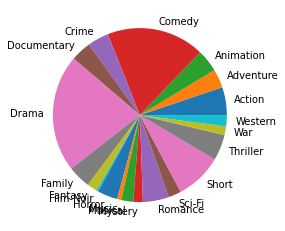

In [23]:
genre_movies = df_cleaned.groupby(['genre'])['name'].count()
#display (genre_movies) 
labels = genre_movies.keys()
plt.pie(genre_movies, labels = labels)
plt.show()

### Plot a graph showing the mean Rank for each year 

year
1892    3.780000
1893    6.800000
1894    6.100000
1895    5.644444
1896    4.307407
          ...   
2000    6.065483
2001    6.134224
2002    6.299257
2003    6.207317
2004    6.216699
Name: rank, Length: 113, dtype: float64


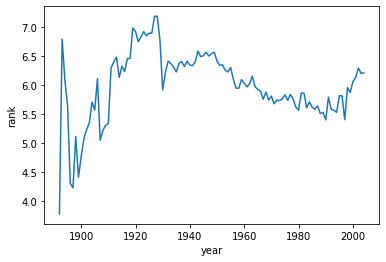

In [24]:
mean_rank = df_cleaned.groupby('year')['rank'].mean()
print(mean_rank)

chart = sns.lineplot(data=mean_rank)
sns.set_style("whitegrid")

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  
2.  
3.   

### Complete the tasks you have set out in the exercise above. 
---


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Revising of previous code functions.

## What caused you the most difficulty?

The complexity of large databases and new functions required for the above questions as well as trying to implement graphs for the correct variables.